<a href="https://colab.research.google.com/github/caojialun/Galen/blob/master/Bitcoin_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



0.   Initialization




In [128]:
from math import sqrt
from numpy import concatenate
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline



1.   Load and clean data





In [129]:
data = pd.read_csv(filepath_or_buffer="/content/bitcoin_price_Training - Training.csv", index_col="Date")

In [130]:
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [131]:
data.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"




1.1   Choose the feature through the heatmap



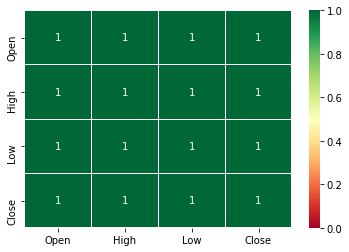

In [132]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)



1.2   Using scatter to show the "Close" data



In [ ]:
btc_trace = go.Scatter(x=data.index, y=data['Close'], name='Price')
py.iplot([btc_trace])

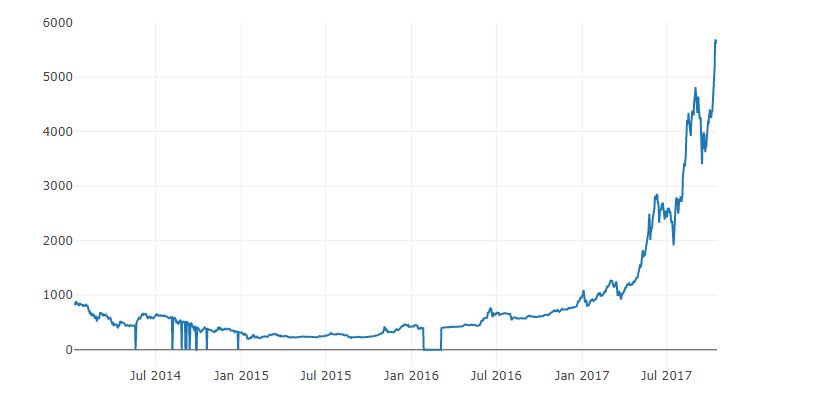

1.3 Using "ffill" to fill the value that is 0

In [134]:
data['Close'].replace(0, np.nan, inplace=True)
data['Close'].fillna(method='ffill', inplace=True)

1.4 Show the figure after filling

In [ ]:
btc_trace = go.Scatter(x=data.index, y=data['Close'], name='Price')
py.iplot([btc_trace])

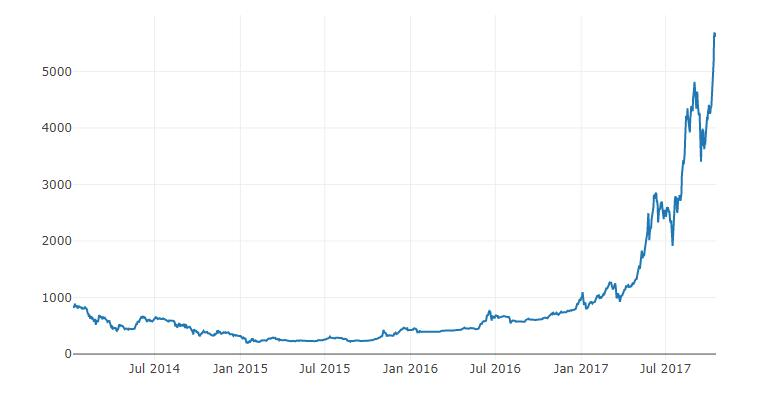




2.   LSTM






2.1   Normalization



In [136]:
from sklearn.preprocessing import MinMaxScaler
values = data['Close'].values.reshape(-1,1)
value_norm = MinMaxScaler(feature_range=(0, 1)).fit_transform(values)

In [137]:
value_norm

array([[0.97135669],
       [0.93046635],
       [0.91983195],
       ...,
       [0.02442139],
       [0.02633856],
       [0.02276377]])

2.2 Split the train and test set

In [138]:
train_size = int(len(value_norm) * 0.7)
test_size = len(value_norm) - train_size
train, test = value_norm[0:train_size], value_norm[train_size:]
print(len(train),len(test))

1089 467


In [139]:
def create_dataset(dataset, look_back=1):

  dataX, dataY = [], []
  for i in range(len(dataset) - look_back):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i+look_back, 0])
  print(len(dataX),len(dataY))
  return np.array(dataX), np.array(dataY)

In [140]:
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

1088 1088
466 466


In [141]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)
print(testX.shape)

(1088, 1, 1)
(466, 1, 1)


2.3 Modeling


In [142]:
# Initialise the sequential model
model = Sequential()
# Add the LSTM hidden layer with 100 units
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
# Add the output layer
model.add(Dense(1))
# Compile the model with Mean Absolute Error as the loss factor and ADAM as the optimiser
model.compile(loss='mae', optimizer='adam')
# Fit the model using the training and testing data
history = model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Epoch 1/200
11/11 [==============================] - 2s 52ms/step - loss: 0.3333 - val_loss: 0.0961
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.2788 - val_loss: 0.0856
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.2409 - val_loss: 0.0787
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 0.2159 - val_loss: 0.0756
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.2039 - val_loss: 0.0738
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1982 - val_loss: 0.0721
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1951 - val_loss: 0.0706
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1916 - val_loss: 0.0689
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.0670
Epoch 10/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1814 - val_loss: 0.0649
Epoch 11

2.4 Show the Loss value of each prediction.

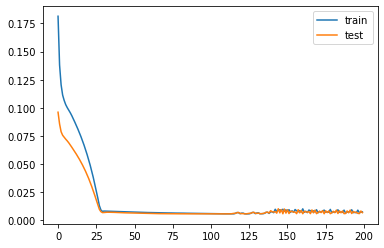

In [143]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

2.5 Predict the test_set

(466, 1)


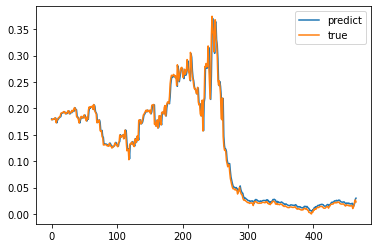

In [144]:
yhat = model.predict(testX) # Here yhat is the predicted value from the test set (y_pred)
print(yhat.shape)

plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

2.6 RMSE

In [145]:
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01208


3. Combine all attributes into one feature for prediction

In [146]:
data['Open'].replace(0, np.nan, inplace=True)
data['Open'].fillna(method='ffill', inplace=True)

In [147]:
values = data[['Open'] + ['Close'] + ['High'] + ['Low']].values

In [148]:
value_nrom = MinMaxScaler(feature_range=(0, 1)).fit_transform(values)

In [149]:
value_nrom

array([[0.93414266, 0.97135669, 0.96229853, 0.95678559],
       [0.92067514, 0.93046635, 0.9174868 , 0.92948468],
       [0.94931917, 0.91983195, 0.93465739, 0.94676396],
       ...,
       [0.02617238, 0.02442139, 0.02473892, 0.02469189],
       [0.02285837, 0.02633856, 0.02493035, 0.02467387],
       [0.02315649, 0.02276377, 0.02099578, 0.02398919]])

In [150]:
train_size = int(len(value_norm) * 0.7)
test_size = len(value_norm) - train_size
train, test = value_norm[0:train_size], value_norm[train_size:]
print(len(train),len(test))

1089 467


In [151]:
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

1088 1088
466 466


In [152]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)
print(testX.shape)

(1088, 1, 1)
(466, 1, 1)


In [153]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Epoch 1/200
11/11 [==============================] - 2s 50ms/step - loss: 0.3283 - val_loss: 0.0938
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 0.2707 - val_loss: 0.0829
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.2314 - val_loss: 0.0765
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 0.2083 - val_loss: 0.0745
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1986 - val_loss: 0.0726
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 0.1943 - val_loss: 0.0709
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1919 - val_loss: 0.0694
Epoch 8/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1885 - val_loss: 0.0676
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1836 - val_loss: 0.0656
Epoch 10/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1778 - val_loss: 0.0635
Epoch 11

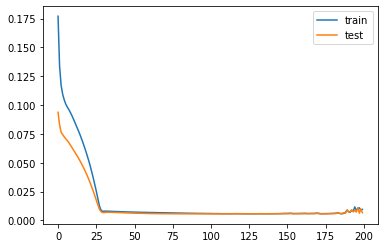

In [154]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

(466, 1)


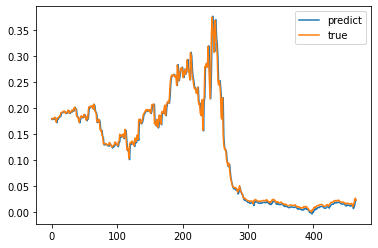

In [155]:
yhat = model.predict(testX) # Here yhat is the predicted value from the test set (y_pred)
print(yhat.shape)

plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

In [156]:
rmse1 = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01208


·LSTM with single feature of Close Price have RMSE of 0.1208.


·LSTM with features of Open, High, Low and Close Price have RMSE of 0.1208.


In summary, the RMSE values of the above two methods are similar, but observing the Loss chart, it is found that the latter is more stable after epoch=100, so the latter is selected as the prediction method.